In [2]:
# Importação dos Pacotes
import xarray as xr
import numpy as np

#### Creating an Xarray example

In [3]:
values = np.random.random(size=(4,3))
values


array([[0.42612853, 0.82277354, 0.32257642],
       [0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783],
       [0.84965784, 0.1327341 , 0.56527648]])

In [4]:
# Dims Y represents rows and X represent columns.
dimensions = ("y", "x")

In [5]:
# Cordinates labels/values
cordinates = {
    "x":[10,11,12],
    "y":[10,20,30,40]
}

In [6]:
data = xr.DataArray(values, dims=dimensions, coords=cordinates )
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.42612853, 0.82277354, 0.32257642],
       [0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783],
       [0.84965784, 0.1327341 , 0.56527648]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40

### Coordinates and Attributes

#### Proprities of Xarray

In [7]:
data.dims

('y', 'x')

In [8]:
data.size

12

In [9]:
data.dtype

dtype('float64')

In [10]:
data.coords

Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40

#### Acess specific coordinate

In [11]:
data.coords["x"]

<xarray.DataArray 'x' (x: 3)>
array([10, 11, 12])
Coordinates:
  * x        (x) int32 10 11 12

In [12]:
data.coords["y"]

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40

#### Acess values on the coordinates

In [13]:
data.coords["x"][1]

<xarray.DataArray 'x' ()>
array(11)
Coordinates:
    x        int32 11

In [14]:
for i in range(0, len(data.coords["x"])):
    print(data.coords["x"][i])

<xarray.DataArray 'x' ()>
array(10)
Coordinates:
    x        int32 10
<xarray.DataArray 'x' ()>
array(11)
Coordinates:
    x        int32 11
<xarray.DataArray 'x' ()>
array(12)
Coordinates:
    x        int32 12


In [15]:
for i in range(0, len(data.coords["y"])):
    print(data.coords["y"][i])

<xarray.DataArray 'y' ()>
array(10)
Coordinates:
    y        int32 10
<xarray.DataArray 'y' ()>
array(20)
Coordinates:
    y        int32 20
<xarray.DataArray 'y' ()>
array(30)
Coordinates:
    y        int32 30
<xarray.DataArray 'y' ()>
array(40)
Coordinates:
    y        int32 40


#### Using pandas-like notation

In [16]:
data.x[1]

<xarray.DataArray 'x' ()>
array(11)
Coordinates:
    x        int32 11

In [17]:
data.y[1]

<xarray.DataArray 'y' ()>
array(20)
Coordinates:
    y        int32 20

In [18]:
data.x.values

array([10, 11, 12])

#### Attributes

In [19]:
data.attrs = {"author": "AR", "date": "2020-09-30"}
data.attrs["name"] = "density"
data.attrs["units"] = "g/cm^3"
data.x.attrs["units"] = "cm"
data.y.attrs["units"] = "cm"

In [20]:
data.attrs

{'author': 'AR', 'date': '2020-09-30', 'name': 'density', 'units': 'g/cm^3'}

In [21]:
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.42612853, 0.82277354, 0.32257642],
       [0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783],
       [0.84965784, 0.1327341 , 0.56527648]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [22]:
data.x

<xarray.DataArray 'x' (x: 3)>
array([10, 11, 12])
Coordinates:
  * x        (x) int32 10 11 12
Attributes:
    units:    cm

In [23]:
data.y

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

In [24]:
data["y"]

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

In [25]:
data.coords["y"]

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

### Subsetting arrays

#### Using the Python square brackets

In [26]:
# First row, also a DataArray
data[0,:]

<xarray.DataArray (x: 3)>
array([0.42612853, 0.82277354, 0.32257642])
Coordinates:
  * x        (x) int32 10 11 12
    y        int32 10
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [27]:
# last two columns
data[:, -2:]

<xarray.DataArray (y: 4, x: 2)>
array([[0.82277354, 0.32257642],
       [0.56487177, 0.21509344],
       [0.35256546, 0.13672783],
       [0.1327341 , 0.56527648]])
Coordinates:
  * x        (x) int32 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [28]:
# Can modify in-place
data[-1,-1] = 0.999999
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.42612853, 0.82277354, 0.32257642],
       [0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783],
       [0.84965784, 0.1327341 , 0.999999  ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [29]:
# first row, numpy array 
data.values[0,0:]

array([0.42612853, 0.82277354, 0.32257642])

##### DataArray.isel() selects by coordinate index (single index, list, range ) - Pandas Iloc

In [30]:
data.isel(y=1) # Second row

<xarray.DataArray (x: 3)>
array([0.01172736, 0.56487177, 0.21509344])
Coordinates:
  * x        (x) int32 10 11 12
    y        int32 20
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [31]:
type(data.isel(y=1))

xarray.core.dataarray.DataArray

In [32]:
data.isel(y=0, x=[-2, -1]) # first row, last two columns

<xarray.DataArray (x: 2)>
array([0.82277354, 0.32257642])
Coordinates:
  * x        (x) int32 11 12
    y        int32 10
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [33]:
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.42612853, 0.82277354, 0.32257642],
       [0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783],
       [0.84965784, 0.1327341 , 0.999999  ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [34]:
data.isel(y=0, x=[-2, -1]).values

array([0.82277354, 0.32257642])

##### DataArray.sel() selects by coordinate value (single value, list, range ) Pandas loc

In [35]:
data.x.dtype

dtype('int32')

In [36]:
data.x.values

array([10, 11, 12])

In [37]:
data.sel(x=10)

<xarray.DataArray (y: 4)>
array([0.42612853, 0.01172736, 0.23828575, 0.84965784])
Coordinates:
    x        int32 10
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [38]:
data.y

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

In [39]:
data.sel(x=10, y=[30,40])

<xarray.DataArray (y: 2)>
array([0.23828575, 0.84965784])
Coordinates:
    x        int32 10
  * y        (y) int32 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [40]:
data.sel(x=10, y=[30,40]).values

array([0.23828575, 0.84965784])

In [41]:
data.sel(y=slice(15,30)) # only 15<=y<=30

<xarray.DataArray (y: 2, x: 3)>
array([[0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 20 30
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [42]:
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.42612853, 0.82277354, 0.32257642],
       [0.01172736, 0.56487177, 0.21509344],
       [0.23828575, 0.35256546, 0.13672783],
       [0.84965784, 0.1327341 , 0.999999  ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

##### DataArray.interp() interpolates by coordinate value

In [47]:
data.interp(x=10.5, y=15) # between 1st ans 2nd rows, between 1st ans 2nd columns

<xarray.DataArray ()>
array(0.4563753)
Coordinates:
    x        float64 10.5
    y        int32 15
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [ ]:
# inter = soma(0.42612853, 0.82277354,0.01172736, 0.56487177) / N elementos 4

In [45]:
data.interp(x=10.5, y=15).values # between 1st ans 2nd rows, between 1st ans 2nd columns

array(0.4563753)

In [46]:
data.interp(x=10.5, y=15, method='nearest').values # closest neighbour

array(0.42612853)

In [48]:
data.interp(y=15) # between 1st ans 2nd rows

<xarray.DataArray (x: 3)>
array([0.21892795, 0.69382265, 0.26883493])
Coordinates:
  * x        (x) int32 10 11 12
    y        int32 15
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

##### Aggregate Functions

In [50]:
meanOfEachColumn = data.mean(dim='y') # apply mean over y
meanOfEachColumn

<xarray.DataArray (x: 3)>
array([0.38144987, 0.46823622, 0.41859917])
Coordinates:
  * x        (x) int32 10 11 12

In [51]:
spatialMean = data.mean(dim=['x', 'y']) # apply mean over both x and y
spatialMean

<xarray.DataArray ()>
array(0.42276175)

In [53]:
spatialMean = data.mean() # same
spatialMean

<xarray.DataArray ()>
array(0.42276175)

##### DataArray.groupby()

In [54]:
columns = data.groupby('x')
columns

DataArrayGroupBy, grouped over 'x'
3 groups with labels 10, 11, 12.

###### You can apply a function separately to each group:

In [56]:
columns.map(lambda v: v.sum()/len(v)) # could use v.mean() too with the same result

<xarray.DataArray (x: 3)>
array([0.38144987, 0.46823622, 0.41859917])
Coordinates:
  * x        (x) int32 10 11 12

In [57]:
columns.map(lambda v: (v-v.min())/(v.max() - v.min())) # normalize data in each column

<xarray.DataArray (y: 4, x: 3)>
array([[0.49455316, 1.        , 0.21528414],
       [0.        , 0.62625068, 0.09077751],
       [0.27037851, 0.31857797, 0.        ],
       [1.        , 0.        , 1.        ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40

#### Plotting

##### Matplotlib is integrated directly into xarray:

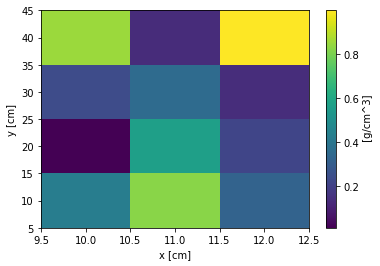

In [59]:
data.plot(size=4)

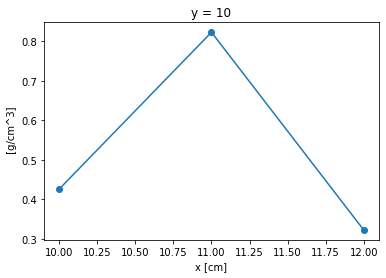

In [60]:
data.isel(y=0).plot(marker='o', size=4, markersize=6)

#### Create a 3D Array

##### Let´s create a function inside a unit cube x,y,z ∈ [0,1] on a 50^3 grid:

In [61]:
import numpy as np

n = 50
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n).reshape(n, 1)
z = np.linspace(0, 1, n).reshape(n, 1, 1)

In [62]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [63]:
y

array([[0.        ],
       [0.02040816],
       [0.04081633],
       [0.06122449],
       [0.08163265],
       [0.10204082],
       [0.12244898],
       [0.14285714],
       [0.16326531],
       [0.18367347],
       [0.20408163],
       [0.2244898 ],
       [0.24489796],
       [0.26530612],
       [0.28571429],
       [0.30612245],
       [0.32653061],
       [0.34693878],
       [0.36734694],
       [0.3877551 ],
       [0.40816327],
       [0.42857143],
       [0.44897959],
       [0.46938776],
       [0.48979592],
       [0.51020408],
       [0.53061224],
       [0.55102041],
       [0.57142857],
       [0.59183673],
       [0.6122449 ],
       [0.63265306],
       [0.65306122],
       [0.67346939],
       [0.69387755],
       [0.71428571],
       [0.73469388],
       [0.75510204],
       [0.7755102 ],
       [0.79591837],
       [0.81632653],
       [0.83673469],
       [0.85714286],
       [0.87755102],
       [0.89795918],
       [0.91836735],
       [0.93877551],
       [0.959

In [64]:
z

array([[[0.        ]],

       [[0.02040816]],

       [[0.04081633]],

       [[0.06122449]],

       [[0.08163265]],

       [[0.10204082]],

       [[0.12244898]],

       [[0.14285714]],

       [[0.16326531]],

       [[0.18367347]],

       [[0.20408163]],

       [[0.2244898 ]],

       [[0.24489796]],

       [[0.26530612]],

       [[0.28571429]],

       [[0.30612245]],

       [[0.32653061]],

       [[0.34693878]],

       [[0.36734694]],

       [[0.3877551 ]],

       [[0.40816327]],

       [[0.42857143]],

       [[0.44897959]],

       [[0.46938776]],

       [[0.48979592]],

       [[0.51020408]],

       [[0.53061224]],

       [[0.55102041]],

       [[0.57142857]],

       [[0.59183673]],

       [[0.6122449 ]],

       [[0.63265306]],

       [[0.65306122]],

       [[0.67346939]],

       [[0.69387755]],

       [[0.71428571]],

       [[0.73469388]],

       [[0.75510204]],

       [[0.7755102 ]],

       [[0.79591837]],

       [[0.81632653]],

       [[0.83673

In [65]:
f1 = np.sin(5*x)**8 + np.cos(5+25*x*y) * np.cos(5*x) # Function at one side of the cube (z=0)
f1

array([[0.28366219, 0.28218669, 0.27777834, ..., 0.99611218, 0.92296337,
        0.79541231],
       [0.28366219, 0.29210391, 0.29727155, ..., 1.03094303, 1.00135312,
        0.91800259],
       [0.28366219, 0.30198946, 0.31663586, ..., 1.05204159, 1.04776235,
        0.98887279],
       ...,
       [0.28366219, 0.69748965, 0.93422361, ..., 0.89211439, 0.69040141,
        0.4989551 ],
       [0.28366219, 0.70483736, 0.94013318, ..., 0.89094989, 0.73138686,
        0.61626093],
       [0.28366219, 0.71210865, 0.94563505, ..., 0.90891655, 0.80643504,
        0.75870338]])

In [66]:
f2 = np.sin(5*x)**8 + np.cos(5+25*x*y) * np.cos(5*y) # Rotated 90 degrees, other size (z=1)
f2

array([[0.28366219, 0.2836622 , 0.28366503, ..., 1.25610778, 1.1542879 ,
        0.99861026],
       [0.28218667, 0.29210391, 0.3019923 , ..., 1.66993523, 1.57546306,
        1.42705671],
       [0.27777549, 0.29726872, 0.31663586, ..., 1.90666636, 1.81075605,
        1.66058028],
       ...,
       [0.02366659, 0.05849745, 0.07959884, ..., 0.89211439, 0.78913001,
        0.65141903],
       [0.05233765, 0.13072742, 0.17713948, ..., 0.79222129, 0.73138686,
        0.6507574 ],
       [0.08046424, 0.20305452, 0.27392756, ..., 0.75645262, 0.77193857,
        0.75870338]])

In [68]:
f = (1-z)*f1 + x*f2
f

array([[[2.83662185e-01, 2.87975711e-01, 2.89356503e-01, ...,
         2.20095026e+00, 2.05369438e+00, 1.79402257e+00],
        [2.83662185e-01, 2.98065212e-01, 3.09597769e-01, ...,
         2.63271765e+00, 2.54466388e+00, 2.34505930e+00],
        [2.83662185e-01, 3.08056169e-01, 3.29559769e-01, ...,
         2.88088483e+00, 2.82156419e+00, 2.64945308e+00],
        ...,
        [2.83662185e-01, 6.98683475e-01, 9.37472545e-01, ...,
         1.74781594e+00, 1.46342673e+00, 1.15037413e+00],
        [2.83662185e-01, 7.07505264e-01, 9.47363361e-01, ...,
         1.65083561e+00, 1.44784745e+00, 1.26701832e+00],
        [2.83662185e-01, 7.16252621e-01, 9.56815772e-01, ...,
         1.63449356e+00, 1.56261976e+00, 1.51740676e+00]],

       [[2.77873161e-01, 2.82216799e-01, 2.83687557e-01, ...,
         2.18062144e+00, 2.03485839e+00, 1.77778967e+00],
        [2.77873161e-01, 2.92103908e-01, 3.03531003e-01, ...,
         2.61167799e+00, 2.52422810e+00, 2.32632456e+00],
        [2.77873161e-01, 

In [70]:
coords = {'z': z.flatten(), 'y': y.flatten(), 'x':x} # Supply 1D array to all
rho = xr.DataArray(
    f,
    dims=('z','y','x'),
    coords=coords
)

In [71]:
rho

<xarray.DataArray (z: 50, y: 50, x: 50)>
array([[[2.83662185e-01, 2.87975711e-01, 2.89356503e-01, ...,
         2.20095026e+00, 2.05369438e+00, 1.79402257e+00],
        [2.83662185e-01, 2.98065212e-01, 3.09597769e-01, ...,
         2.63271765e+00, 2.54466388e+00, 2.34505930e+00],
        [2.83662185e-01, 3.08056169e-01, 3.29559769e-01, ...,
         2.88088483e+00, 2.82156419e+00, 2.64945308e+00],
        ...,
        [2.83662185e-01, 6.98683475e-01, 9.37472545e-01, ...,
         1.74781594e+00, 1.46342673e+00, 1.15037413e+00],
        [2.83662185e-01, 7.07505264e-01, 9.47363361e-01, ...,
         1.65083561e+00, 1.44784745e+00, 1.26701832e+00],
        [2.83662185e-01, 7.16252621e-01, 9.56815772e-01, ...,
         1.63449356e+00, 1.56261976e+00, 1.51740676e+00]],

       [[2.77873161e-01, 2.82216799e-01, 2.83687557e-01, ...,
         2.18062144e+00, 2.03485839e+00, 1.77778967e+00],
        [2.77873161e-01, 2.92103908e-01, 3.03531003e-01, ...,
         2.61167799e+00, 2.52422810e+00, 2.32632456e+00],
        [2.77873161e-01, 3.01893119e-01, 3.23097813e-01, ...,
         2.85941459e+00, 2.80018129e+00, 2.62927200e+00],
...
        [5.78902419e-03, 1.54283082e-02, 2.23147201e-02, ...,
         8.73907970e-01, 7.87115141e-01, 6.61601788e-01],
        [5.78902419e-03, 1.70523424e-02, 2.64165741e-02, ...,
         7.78068374e-01, 7.31386859e-01, 6.63334152e-01],
        [5.78902419e-03, 1.86767995e-02, 3.04793914e-02, ...,
         7.44126323e-01, 7.72642577e-01, 7.74187122e-01]],

       [[0.00000000e+00, 5.78902443e-03, 1.15781646e-02, ...,
         1.20483808e+00, 1.13073101e+00, 9.98610261e-01],
        [0.00000000e+00, 5.96130424e-03, 1.23262161e-02, ...,
         1.60177461e+00, 1.54331076e+00, 1.42705671e+00],
        [0.00000000e+00, 6.06670853e-03, 1.29239125e-02, ...,
         1.82884325e+00, 1.77380184e+00, 1.66058028e+00],
        ...,
        [0.00000000e+00, 1.19382553e-03, 3.24893210e-03, ...,
         8.55701554e-01, 7.73025317e-01, 6.51419030e-01],
        [0.00000000e+00, 2.66790648e-03, 7.23018270e-03, ...,
         7.59885723e-01, 7.16460596e-01, 6.50757399e-01],
        [0.00000000e+00, 4.14396985e-03, 1.11807168e-02, ...,
         7.25577006e-01, 7.56184719e-01, 7.58703379e-01]]])
Coordinates:
  * z        (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * x        (x) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0